In [1]:
!pip install pymongo


# Analyse der Lebensmittelpreise

Dieses Notebook dient der Analyse von Lebensmittelpreisen aus verschiedenen Supermärkten in Österreich.

## Ziel
Vergleich der Preise für Grundnahrungsmittel (z. B. Milch, Brot, Eier) in zwei Supermärkten.

## Verbindung zur MongoDB


In [5]:
from pymongo import MongoClient
import pandas as pd

# Verbindung zur MongoDB
client = MongoClient("mongodb://localhost:27017/")
db = client["supermarkt_preise"]
collection = db["lebensmittel"]

# Daten abrufen
daten = list(collection.find())
df = pd.DataFrame(daten)

# Falls '_id' vorhanden, entfernen
if '_id' in df.columns:
    df.drop(columns=['_id'], inplace=True)

df.head()




,Produkt,Preis,Seite,Supermarkt,Kategorie,Link
0,Ja! Natürlich Vollmilch länger frisch 3.5%,"1,79 €",https://shop.billa.at/kategorie/kuehlwaren-13841,Billa,NaN,NaN
1,Clever Haltbar-Vollmilch 3.5%,"1,19 €",https://shop.billa.at/kategorie/kuehlwaren-13841,Billa,NaN,NaN
2,Clever Toastschinken,"2,69 €",https://shop.billa.at/kategorie/kuehlwaren-13841,Billa,NaN,NaN
3,Clever Österreichische Teebutter,"2,39 €",https://shop.billa.at/kategorie/kuehlwaren-13841,Billa,NaN,NaN
4,Ja! Natürlich Butter,"3,19 €",https://shop.billa.at/kategorie/kuehlwaren-13841,Billa,NaN,NaN


## Datenvorverarbeitung (optional, je nach Spaltenstruktur)
Beispiel: Leere Spalten wie 'Kategorie' oder 'Link' entfernen

In [7]:
# Falls nötig: Konvertiere Preis-Spalte von String zu Float
if df["Preis"].dtype != float:
    df["Preis"] = df["Preis"].astype(str).str.replace("€", "").str.replace(",", ".").astype(float)


# Vorschau nach der Umwandlung
df.head()


,Produkt,Preis,Seite,Supermarkt,Kategorie,Link
0,Ja! Natürlich Vollmilch länger frisch 3.5%,1.79,https://shop.billa.at/kategorie/kuehlwaren-13841,Billa,NaN,NaN
1,Clever Haltbar-Vollmilch 3.5%,1.19,https://shop.billa.at/kategorie/kuehlwaren-13841,Billa,NaN,NaN
2,Clever Toastschinken,2.69,https://shop.billa.at/kategorie/kuehlwaren-13841,Billa,NaN,NaN
3,Clever Österreichische Teebutter,2.39,https://shop.billa.at/kategorie/kuehlwaren-13841,Billa,NaN,NaN
4,Ja! Natürlich Butter,3.19,https://shop.billa.at/kategorie/kuehlwaren-13841,Billa,NaN,NaN


## Durchschnittspreise pro Produkt
Wir berechnen die Durchschnittspreise pro Produkt und pro Supermarkt.

In [21]:
# Durchschnittspreis pro Produkt
durchschnitt_produkt = df.groupby("Produkt")["Preis"].mean().sort_values()
print("Durchschnittspreis pro Produkt:")
print(durchschnitt_produkt)

Durchschnittspreis pro Produkt:
Produkt
Clever Knopfsemmel                                       0.25
BELLA Zitronen Säuerungsmittel                           0.39
Langsemmel                                               0.44
Ja! Natürlich Kaisersemmel                               0.44
Cremejogurt Kaffee                                       0.45
                                                        ...  
Bio-Ente                                                35.99
Bio-Rinds-Huftsteak                                     36.99
MEINE KÄSETHEKE Frischkäsezubereitung, Schnittlauch       NaN
MEINE KÄSETHEKE Frischkäsezubereitung, Tomate             NaN
MEINE KÄSETHEKE Frischkäsezubereitung, Ziege-Kräuter      NaN
Name: Preis, Length: 597, dtype: float64


## Durchschnittpreise pro Supermarket

In [22]:
durchschnitt_supermarkt = df.groupby("Supermarkt")["Preis"].mean().sort_values()
print("\nDurchschnittspreis pro Supermarkt:")
print(durchschnitt_supermarkt)



Durchschnittspreis pro Supermarkt:
Supermarkt
Billa        2.867167
Hofer        3.799158
Interspar    4.696750
Name: Preis, dtype: float64


## Visualisierung der Durchschnittspreise pro Produkt

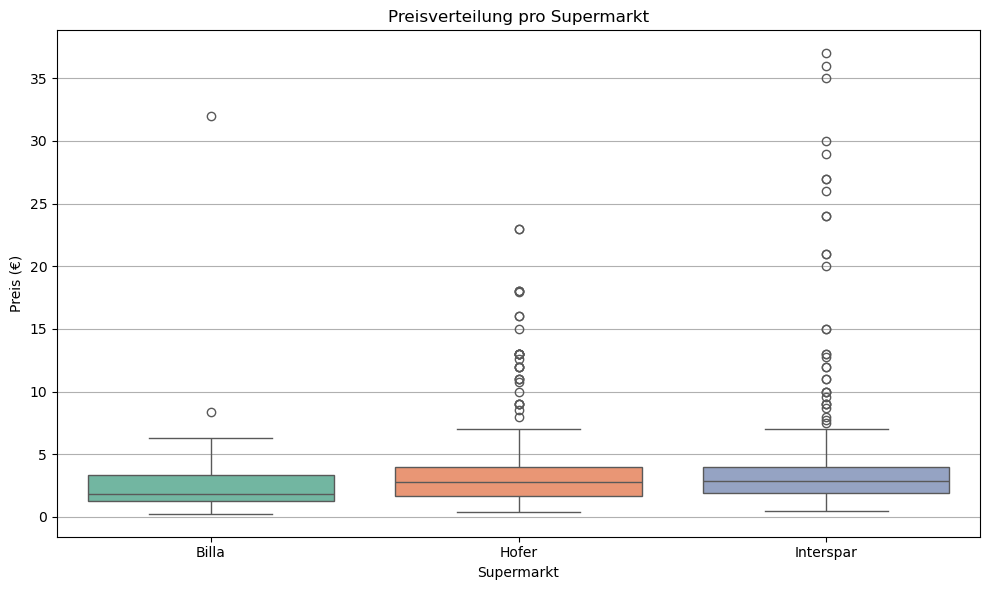

In [28]:
## Boxplot nach Supermarkt
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Supermarkt", y="Preis", hue="Supermarkt", palette="Set2", legend=False)
plt.title("Preisverteilung pro Supermarkt")
plt.ylabel("Preis (€)")
plt.xlabel("Supermarkt")
plt.grid(axis="y")
plt.tight_layout()
plt.show()



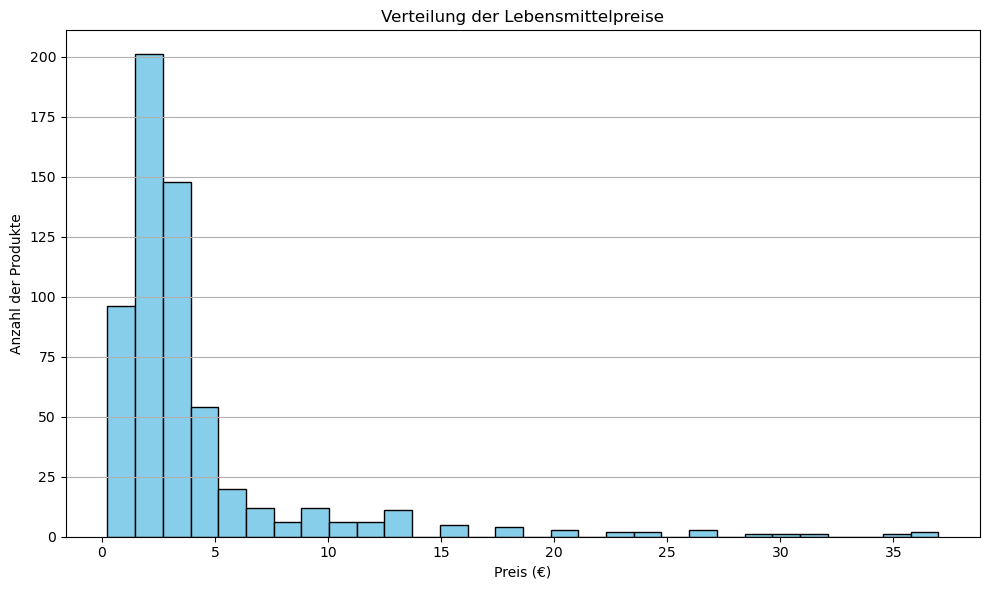

In [27]:
## Histogramm aller Preise
plt.figure(figsize=(10, 6))
plt.hist(df["Preis"], bins=30, color="skyblue", edgecolor="black")
plt.title("Verteilung der Lebensmittelpreise")
plt.xlabel("Preis (€)")
plt.ylabel("Anzahl der Produkte")
plt.grid(axis="y")
plt.tight_layout()
plt.show()

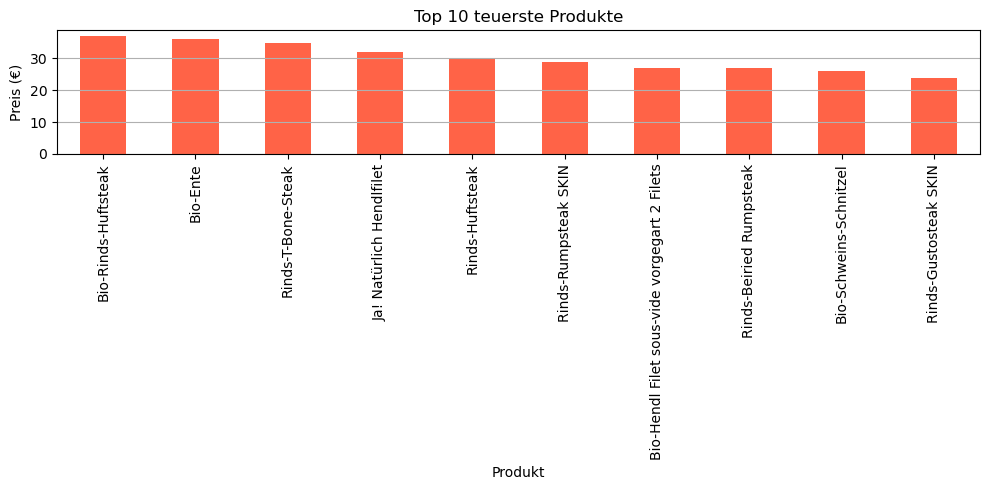

In [29]:
# Teuerste Produkte
top10 = durchschnitt_produkt.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
top10.plot(kind='bar', title='Top 10 teuerste Produkte', ylabel='Preis (€)', xlabel='Produkt', color='tomato')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


## Umsetzung von MapReduce mit Pandas
In dieser Analyse wurde eine einfache **MapReduce-Logik** mit `pandas` umgesetzt:

- **Map-Schritt**: Gruppierung der Produkte oder Supermärkte mittels `groupby()`
- **Reduce-Schritt**: Aggregation durch Berechnung des Durchschnittspreises mit `.mean()`

Diese Form entspricht dem typischen MapReduce-Paradigma, nur dass `pandas` dies intern verarbeitet.
Für unser Projektvolumen ist das eine effiziente Lösung.

In [8]:
# Manuelle MapReduce-Logik: Durchschnittspreis pro Produkt

mapped = {}
for _, row in df.iterrows():
    produkt = row["Produkt"]
    preis = row["Preis"]
    if produkt not in mapped:
        mapped[produkt] = []
    mapped[produkt].append(preis)

# Reduce: Durchschnitt berechnen
reduced = {produkt: sum(preise)/len(preise) for produkt, preise in mapped.items()}

# Ergebnis anzeigen (Top 5)
for produkt, avg in list(reduced.items())[:5]:
    print(f"{produkt}: {avg:.2f} €")

Ja! Natürlich Vollmilch länger frisch 3.5%: 1.79 €
Clever Haltbar-Vollmilch 3.5%: 1.19 €
Clever Toastschinken: 2.69 €
Clever Österreichische Teebutter: 2.39 €
Ja! Natürlich Butter: 3.19 €


## Fazit der Preis-Analyse
Die Analyse zeigt deutliche Unterschiede in der Preisstruktur der Supermärkte Billa, Hofer und Interspar:
- Durchschnittspreise: In der Gesamtauswertung wirkt Hofer im Durchschnitt am günstigsten, während Interspar tendenziell höhere Preise aufweist.
- Preisspanne: Die Boxplot-Visualisierung zeigt, dass es in allen Supermärkten sowohl günstige als auch sehr hochpreisige Produkte gibt – insbesondere bei Interspar ist die Spannweite deutlich größer.
- Einfluss der Produktauswahl: Die Preisunterschiede hängen auch stark davon ab, welche Produktgruppen ein Supermarkt führt (z. B. Premium- oder Bio-Marken).
- Verteilung: Die Preise in allen Märkten sind rechtsschief verteilt – es gibt wenige sehr teure Produkte, die den Durchschnitt nach oben treiben.
